In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aqi-zip.csv', compression='gzip')

In [3]:
il_df = pd.read_csv('aqi_by_state/IL.csv', compression='gzip')
#il_df = df.drop(columns=['Unnamed: 0'])
il_df.head(3)

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,2448,14010,2022-01-01,42,Good,PM2.5,1,Bloomington,IL,Illinois,40.4757,-88.9703,132710.0,1106.0,America/Chicago
1,2449,14010,2022-01-02,33,Good,PM2.5,1,Bloomington,IL,Illinois,40.4757,-88.9703,132710.0,1106.0,America/Chicago
2,2450,14010,2022-01-03,52,Moderate,PM2.5,1,Bloomington,IL,Illinois,40.4757,-88.9703,132710.0,1106.0,America/Chicago


In [4]:
# df['city_ascii'].value_counts()

In [5]:
chi = df[df['city_ascii'] == 'Chicago']
chi.index = pd.to_datetime(chi['Date'])
chi = chi.sort_index()

# 2002 - 2002
chi = chi.loc['2002':]
# chi

In [7]:
chi_monthly = chi.resample('M').mean()[['AQI']].iloc[:-1]

In [8]:
ca_df = pd.read_csv('aqi_by_state/CA.csv', compression='gzip')

In [9]:
# ca_df['city_ascii'].value_counts()

In [10]:
def get_monthly_df(df, city):
    city_subset = df[df['city_ascii'] == city]
    city_subset.index = pd.to_datetime(city_subset['Date'])
    city_subset = city_subset.sort_index()
    city_subset = city_subset.loc['2002':]
    city_monthly = city_subset.resample('M').mean()[['AQI']]#.iloc[:-1]
    return city_monthly

def plot_city(city_name, state_df, color):
    city_monthly = get_monthly_df(state_df, city_name)
    plt.plot(city_monthly, label = f'{city_name} AQI', color=color)

In [11]:
quality_dict = {
    # str key: label for category
    # int val: upper-bound for the category
    'good': (50, 'green'),
    'moderate': (100, 'gold'),
    'unhealthy for sensitive groups': (150, 'orange'),
    'unhealthy': (200, 'red'),
    # 'very unhealthy': 300,
    #'hazardous': 500
}

Text(0, 0.5, 'Air quality index')

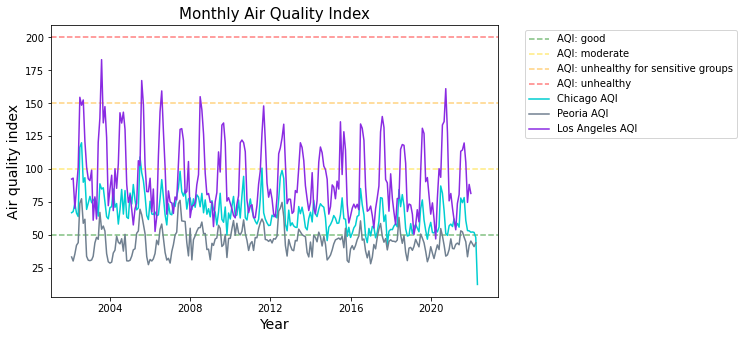

In [12]:
# size for presentation:
# plt.figure(figsize=(12,8))

# size for technical report:
plt.figure(figsize=(8,5))

for quality, ub in quality_dict.items():
    plt.axhline(
        y=ub[0],
        label=f'AQI: {quality}',
        linestyle='--',
        alpha=.5,
        color=ub[1]
)

plot_city('Chicago', state_df=il_df, color='darkturquoise')
plot_city('Peoria', state_df=il_df, color='slategray')
plot_city('Los Angeles', state_df=ca_df, color='blueviolet')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Monthly Air Quality Index', fontdict={'fontsize': 15})
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.ylabel('Air quality index', fontdict={'fontsize': 14})